# FEM Model of a plate with a hole using SimpleFEM 

First we will define the problem from https://www.mscsoftware.com/exercise-modules/plate-hole-stress-analysis



In [2]:
import numpy as np
import sys
sys.path.append('../')
import SimpleFEM as sfem
import gmshparser
import matplotlib.pyplot as plt
mesh = gmshparser.parse("plate_coarse.msh")


print(mesh)


Mesh name: plate_coarse.msh
Mesh version: 4.1
Number of nodes: 338
Minimum node tag: 1
Maximum node tag: 338
Number of node entities: 36
Number of elements: 693
Minimum element tag: 1
Maximum element tag: 693
Number of element entities: 36


In [3]:
for entity in mesh.get_element_entities():
    eltype = entity.get_element_type()
    for element in entity.get_elements():
        elid = element.get_tag()
        elcon = element.get_connectivity()
        if len(elcon) == 3:
            print("Element type: %s" % eltype)
            print("Element id = %s, connectivity = %s" % (elid, elcon))

Element type: 2
Element id = 142, connectivity = [124, 164, 140]
Element type: 2
Element id = 143, connectivity = [140, 165, 124]
Element type: 2
Element id = 144, connectivity = [119, 167, 154]
Element type: 2
Element id = 145, connectivity = [123, 155, 141]
Element type: 2
Element id = 146, connectivity = [141, 163, 160]
Element type: 2
Element id = 147, connectivity = [160, 163, 125]
Element type: 2
Element id = 148, connectivity = [155, 162, 152]
Element type: 2
Element id = 149, connectivity = [157, 168, 161]
Element type: 2
Element id = 150, connectivity = [67, 145, 68]
Element type: 2
Element id = 151, connectivity = [161, 168, 130]
Element type: 2
Element id = 152, connectivity = [125, 163, 140]
Element type: 2
Element id = 153, connectivity = [140, 164, 125]
Element type: 2
Element id = 154, connectivity = [123, 162, 155]
Element type: 2
Element id = 155, connectivity = [154, 167, 153]
Element type: 2
Element id = 156, connectivity = [142, 146, 127]
Element type: 2
Element id 

We will first save the nodes and their coordinates in lists. In this case it will suffice that the id of the connectivity are subcrated by 1, in this way they will point to the right node in the coordinates. Moreover we only need the x and y.

In [4]:
node_id = []
node_c = []

for entity in mesh.get_node_entities():
    for node in entity.get_nodes():
        node_id.append(node.get_tag())
        coord = list(node.get_coordinates())
        node_c.append(coord[0:2])
node_c = np.array(node_c)

Now we will get the connectivity as well - element type 2

In [5]:
conn = []
el_id = []

for entity in mesh.get_element_entities():
    eltype = entity.get_element_type()
    for element in entity.get_elements():
        elid = element.get_tag()
        elcon = list(element.get_connectivity())
        if len(elcon) == 3:
            conn.append([conn - 1 for conn in elcon])
            el_id.append(elid)

conn = np.array(conn)   
print(np.max(conn))

337


Let's now plot the mesh 

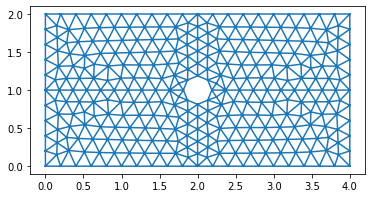

In [6]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.triplot(node_c[:,0], node_c[:,1], conn)
plt.show()


In [18]:
alumininium = sfem.Elastic(30E6, 0.3)
t = 0.25
fixedNodes = {k:"all" for k,v in enumerate(node_c[:,0]) if v == 0}
appliedForce = {k:[0, 600/11] for k,v in enumerate(node_c[:,0]) if v == 4}
boundaryConditions = {
        "fixed" : fixedNodes,
        "applied force" : appliedForce
    }